In [112]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [113]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Data Ingession

In [114]:
data=pd.read_csv("advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [115]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [117]:
#check null
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

EDA

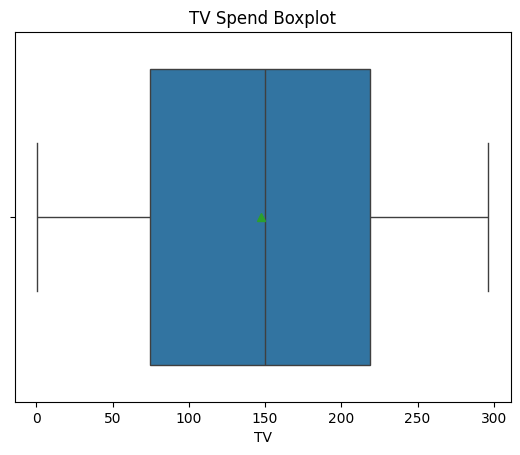

In [118]:
#check for outliers
sns.boxplot(x=data['TV'],showmeans=True)
plt.title("TV Spend Boxplot")
plt.show()

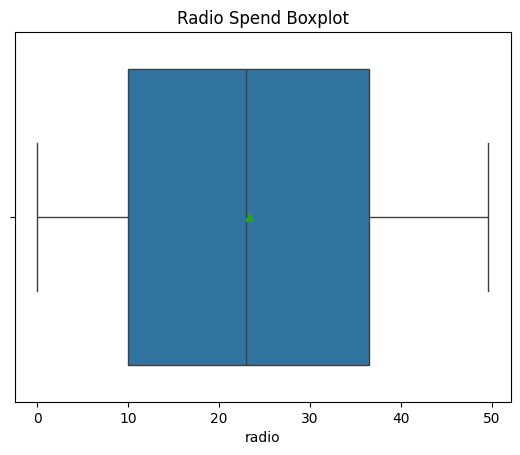

In [119]:
sns.boxplot(x=data['radio'],showmeans=True)
plt.title("Radio Spend Boxplot")
plt.show()

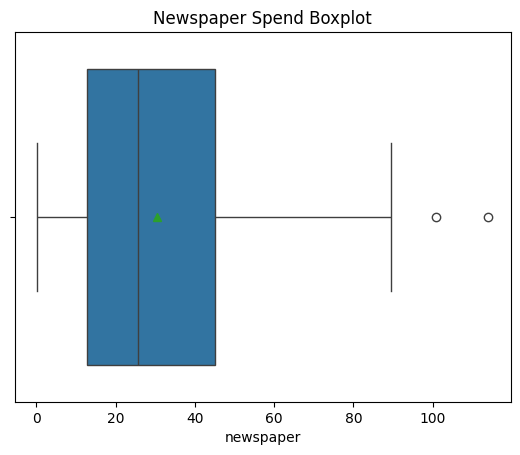

In [120]:
sns.boxplot(x=data['newspaper'],showmeans=True)
plt.title("Newspaper Spend Boxplot")
plt.show()

Here, We can see that there are outliers in the data for newspapers.

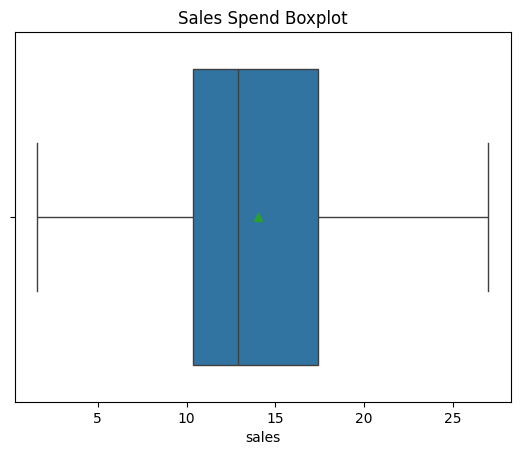

In [121]:
sns.boxplot(x=data['sales'],showmeans=True)
plt.title("Sales Spend Boxplot")
plt.show()

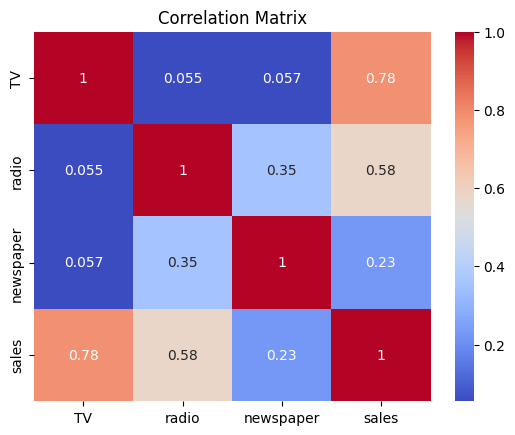

In [122]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [123]:
data['total_spend']=data["TV"]+data["newspaper"]+data['radio']

In [124]:
data.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [125]:
data['tv_to_radio_ratio']=data["TV"]/data['radio']
data['newspaper_to_total_spend_ratio']=data["newspaper"]/data['total_spend']

data.head()

,TV,radio,newspaper,sales,total_spend,tv_to_radio_ratio,newspaper_to_total_spend_ratio
0,230.1,37.8,69.2,22.1,337.1,6.087302,0.205280
1,44.5,39.3,45.1,10.4,128.9,1.132316,0.349884
2,17.2,45.9,69.3,9.3,132.4,0.374728,0.523414
3,151.5,41.3,58.5,18.5,251.3,3.668281,0.232789
4,180.8,10.8,58.4,12.9,250.0,16.740741,0.233600


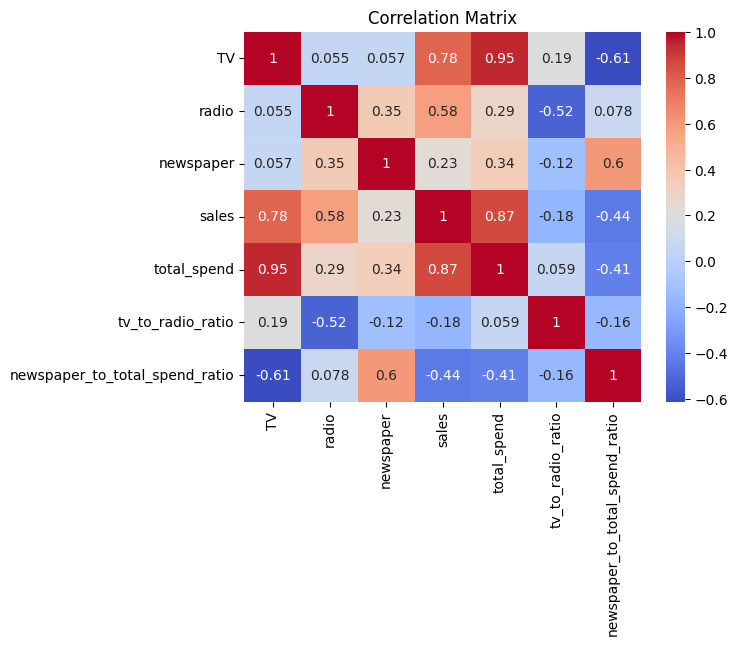

In [126]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Scaling

In [127]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales', 'total_spend', 'tv_to_radio_ratio',
       'newspaper_to_total_spend_ratio'],
      dtype='object')

In [128]:
data[data['tv_to_radio_ratio']==np.inf]

,TV,radio,newspaper,sales,total_spend,tv_to_radio_ratio,newspaper_to_total_spend_ratio
127,80.2,0.0,9.2,8.8,89.4,inf,0.102908


In [129]:
data[data['newspaper_to_total_spend_ratio']==np.inf]

,TV,radio,newspaper,sales,total_spend,tv_to_radio_ratio,newspaper_to_total_spend_ratio


In [130]:
infinite_mask=(data['tv_to_radio_ratio']==np.inf)
data.loc[infinite_mask,'tv_to_radio_ratio']=0

In [131]:
data[data['tv_to_radio_ratio']==np.inf]


,TV,radio,newspaper,sales,total_spend,tv_to_radio_ratio,newspaper_to_total_spend_ratio


Train Test Split

In [132]:
X_train,X_test,y_train,y_test = train_test_split(data,data['sales'],test_size=.2,random_state=42)

In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 7)
(40, 7)
(160,)
(40,)


Modeling

Simple linear regression function

In [134]:
model=LinearRegression()

In [135]:
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred= model.predict(X_test)

In [137]:
y_pred

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

Evaluation

In [138]:
mse = mean_squared_error(y_test,y_pred)
accuracy = r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("Accuracy:",accuracy)

Mean Squared Error: 7.178634237511207e-30
Accuracy: 1.0


##Plot Actual vs. Predicted Values 
This helps to see how well the predicted values match the actual sales.

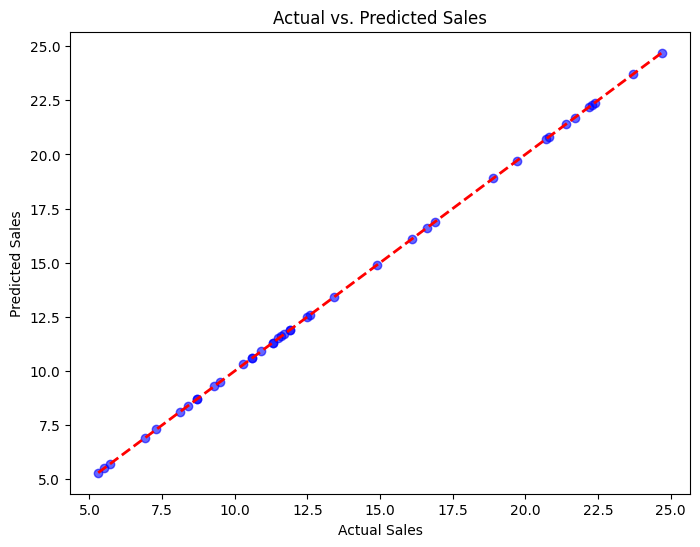

In [148]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line (ideal prediction)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()


##Plot Residual Errors
Residuals (errors) are the difference between actual and predicted values. A good model should have residuals centered around zero.

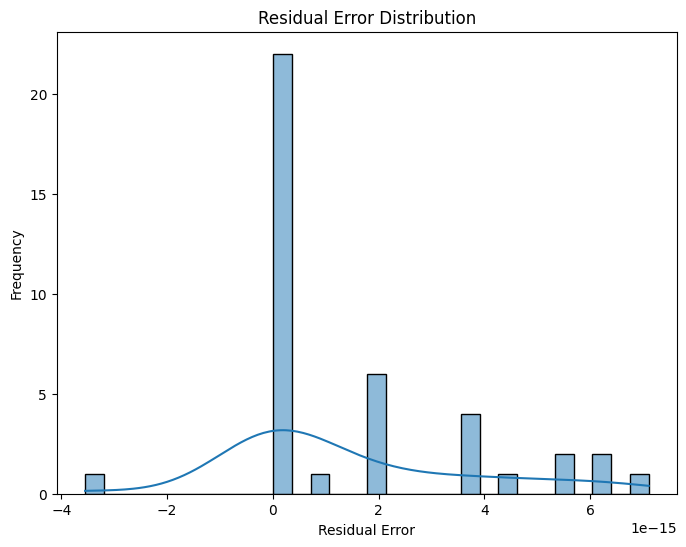

In [149]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Error Distribution")
plt.show()


##Residuals vs. Predicted Plot
To check for any patterns in the residuals.

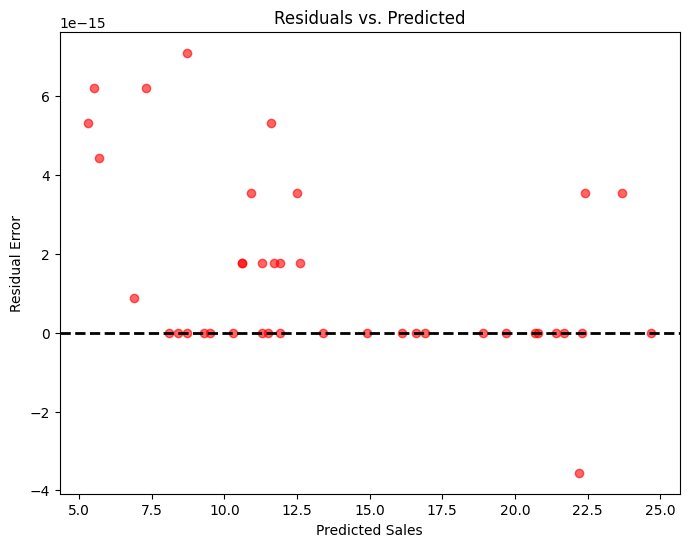

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='red', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel("Predicted Sales")
plt.ylabel("Residual Error")
plt.title("Residuals vs. Predicted")
plt.show()
